# Dataset

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navinbondade23","key":"1e8e85d548f349b67f2e015da44880bd"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mikoim/bitcoin-historical-data

 49% 19.0M/39.2M [00:00<00:00, 34.3MB/s]
100% 39.2M/39.2M [00:00<00:00, 99.2MB/s]


In [ ]:
!unzip -qq -o bitcoin-historical-data.zip

# Libraries 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data




In [ ]:
dataset = pd.read_csv('/content/bitmex_xbtusd_1m_2016-12-31_2018-06-17.csv')
dataset.head()

,time,close,high,low,open,volume
0,1483228740,968.29,968.29,968.29,968.29,0
1,1483228800,968.70,968.76,968.49,968.29,12993
2,1483228860,968.43,968.70,967.20,968.70,73800
3,1483228920,967.21,968.00,967.21,968.43,3500
4,1483228980,966.97,967.21,966.74,967.21,15969


# Data Cleaning & Preprocessing

In [ ]:
dataset = dataset.drop(['time'], axis = 1)

In [ ]:
dataset.tail()

,close,high,low,open,volume
767515,6449.0,6450.0,6448.5,6450.0,466500
767516,6449.0,6449.0,6448.5,6449.0,310310
767517,6448.5,6449.0,6448.5,6449.0,91667
767518,6447.5,6449.0,6447.5,6448.5,556888
767519,6445.0,6448.0,6445.0,6447.5,501032


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767520 entries, 0 to 767519
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   close   767520 non-null  float64
 1   high    767520 non-null  float64
 2   low     767520 non-null  float64
 3   open    767520 non-null  float64
 4   volume  767520 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 MB


In [ ]:
dataset.isnull().sum()

close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [ ]:
break_it = round((20) * (767519/100))
dataset = dataset[:break_it]
dataset.shape

(153504, 5)

In [ ]:
dataset.tail()

,close,high,low,open,volume
153499,1191.7,1191.7,1191.7,1191.7,0
153500,1191.7,1191.7,1191.7,1191.7,0
153501,1191.7,1191.8,1191.5,1191.7,1993
153502,1191.8,1191.9,1191.7,1191.7,7305
153503,1191.8,1191.8,1191.8,1191.8,0


# Data Visualization

[]

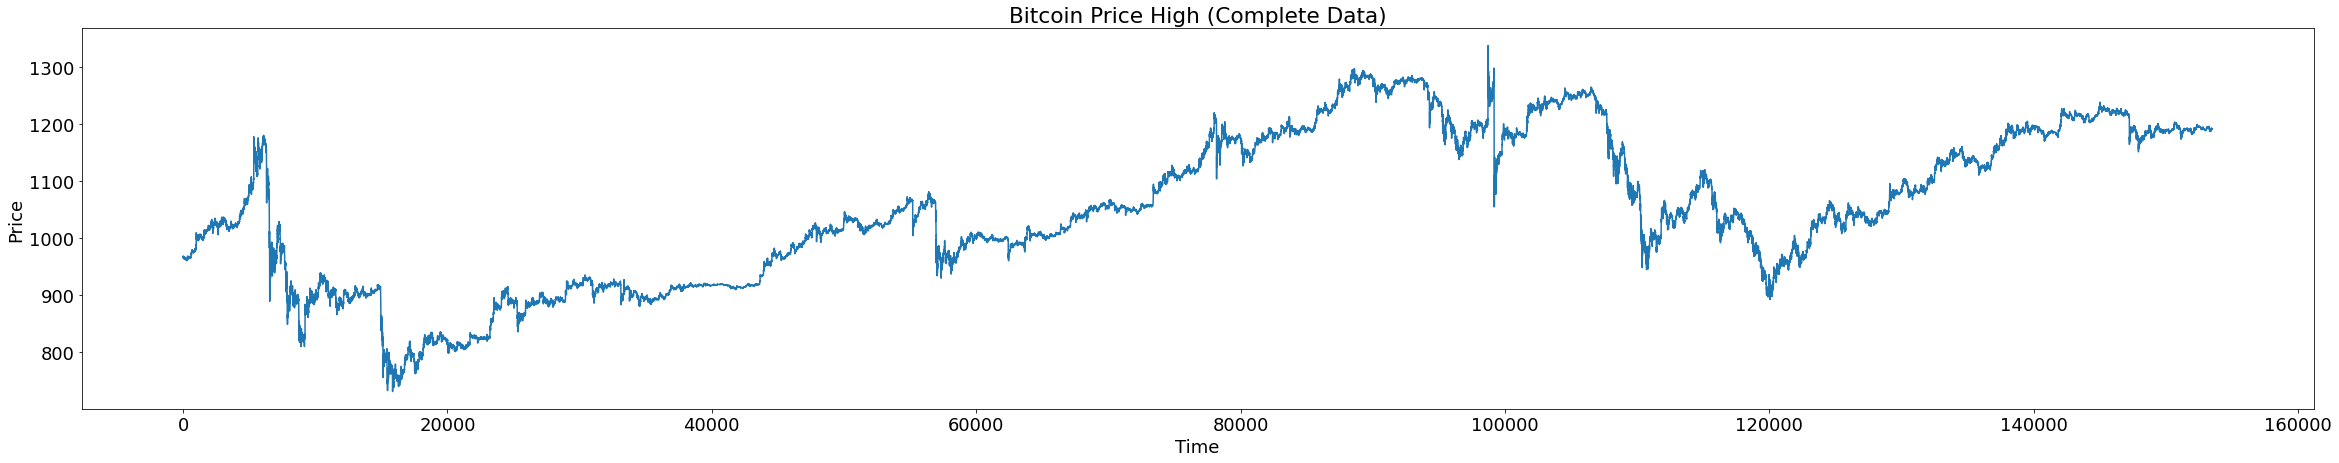

In [ ]:
plt.rcParams["figure.figsize"] = (40,7)
plt.rcParams.update({'font.size': 18})
plt.title('Bitcoin Price High (Complete Data)')
plt.plot(dataset['high'])
plt.ylabel('Price')
plt.xlabel('Time')
plt.plot()

#you hardly seeing any trend, pattern, cycle or season
#its very tough to predict such time series data

# DataSet Splitting

In [ ]:
split = round((90) * (153503/100))
print(split)
train, test = dataset[:split], dataset[split:-1]

138153


In [ ]:
print(train.shape)
print(test.shape)

(138153, 5)
(15350, 5)


In [ ]:
train.head()

,close,high,low,open,volume
0,968.290,968.290,968.290,968.290,0
1,968.700,968.760,968.490,968.290,12993
2,968.430,968.700,967.200,968.700,73800
3,967.210,968.000,967.210,968.430,3500
4,966.970,967.210,966.740,967.210,15969


# Data Visualization

### Train Data

[]

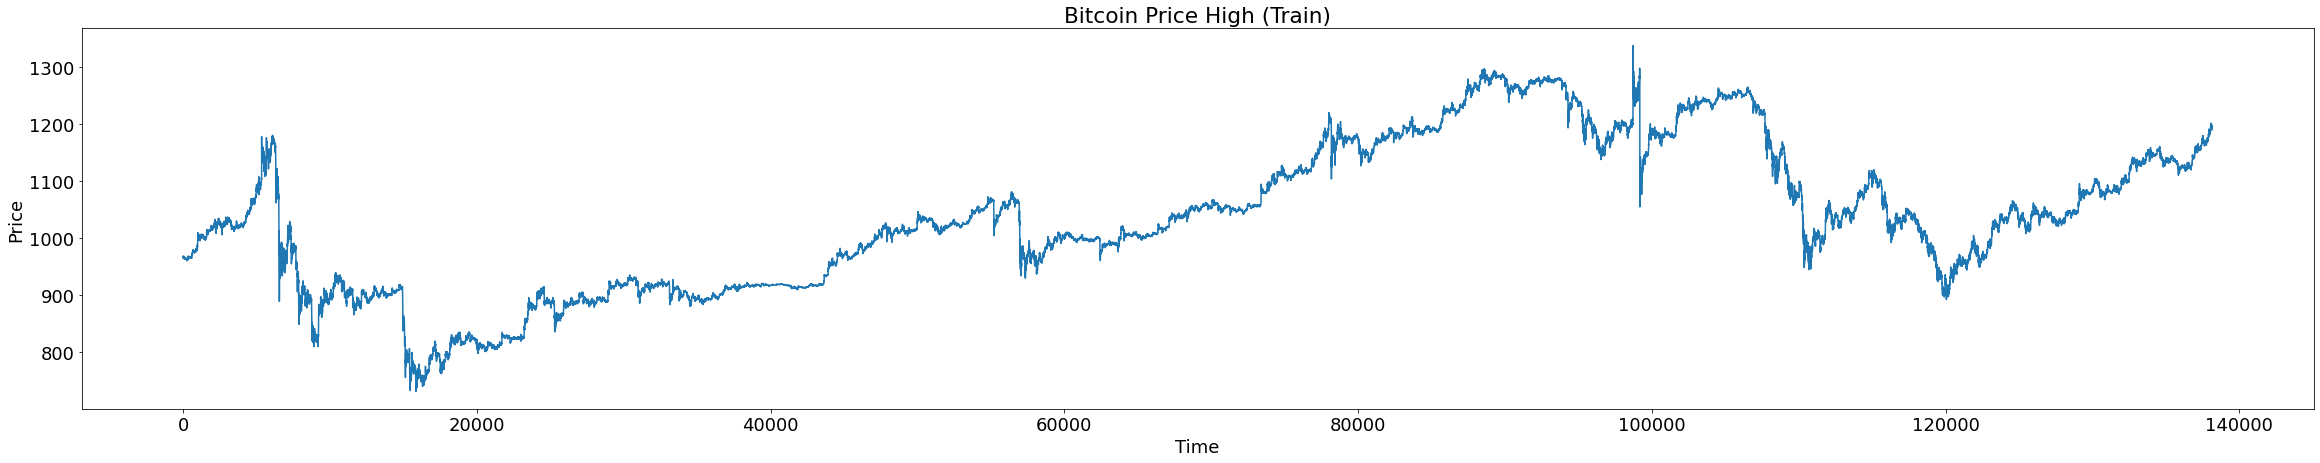

In [ ]:
plt.rcParams["figure.figsize"] = (40,7)
plt.rcParams.update({'font.size': 18})
plt.title('Bitcoin Price High (Train)')
plt.plot(train['high'])
plt.ylabel('Price')
plt.xlabel('Time')
plt.plot()

## Test Data

[]

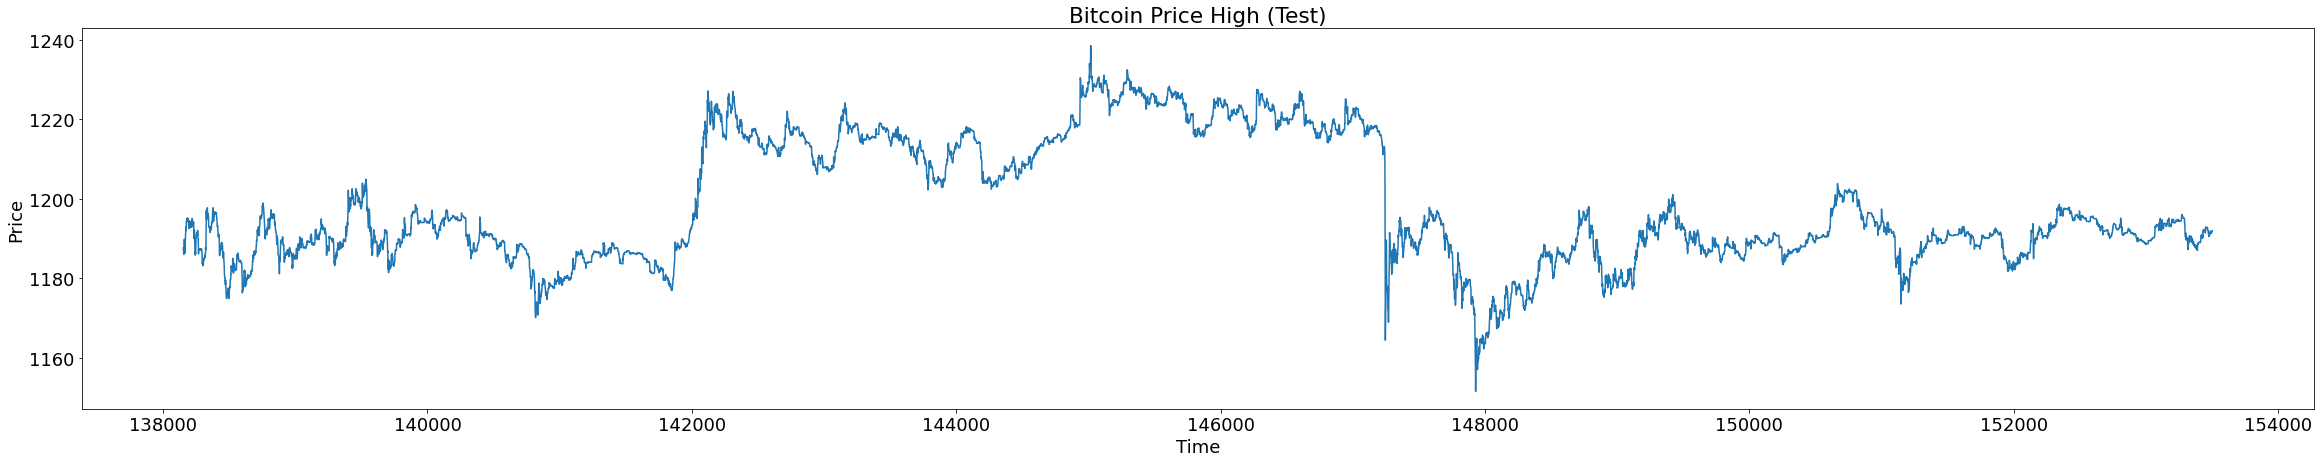

In [ ]:
plt.rcParams["figure.figsize"] = (40,7)
plt.rcParams.update({'font.size': 18})
plt.title('Bitcoin Price High (Test)')
plt.plot(test['high'])
plt.ylabel('Price')
plt.xlabel('Time')
plt.plot()

# Test Data Preprocessing

In [ ]:
#to change exponential value into float
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
print(train.head(3))
print('\n')
print(test.head(3))

    close    high     low    open  volume
0 968.290 968.290 968.290 968.290       0
1 968.700 968.760 968.490 968.290   12993
2 968.430 968.700 967.200 968.700   73800


          close     high      low     open  volume
138153 1187.100 1187.600 1187.100 1187.700   12474
138154 1186.500 1187.200 1186.500 1187.100   21431
138155 1186.100 1186.600 1186.100 1186.500   23000


In [ ]:
scaler = MinMaxScaler()
train_s = scaler.fit_transform(train)

In [ ]:
train_s.max(), train_s.min(),

(1.0000000000000002, 0.0)

In [ ]:
X_train = []
y_train = []

#look back 50
for i in range(50, train_s.shape[0]):
  X_train.append(train_s[i-50 : i])
  #predecting how hight value will get 
  y_train.append(train_s[i,1])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(138103, 50, 5)
(138103,)


# Model

In [ ]:
model = Sequential()

model.add(GRU(units = 30, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 5)))

model.add(GRU(units = 60, activation='relu', return_sequences=True))

model.add(GRU(units = 120, activation='relu'))
model.add(Dropout(0.2))

#Dense

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
r = model.fit(X_train, y_train, epochs=20, batch_size=1000)

Epoch 1/20
139/139 [==============================] - 45s 303ms/step - loss: 0.0700
Epoch 2/20
139/139 [==============================] - 42s 302ms/step - loss: 0.0053
Epoch 3/20
139/139 [==============================] - 41s 298ms/step - loss: 0.0035
Epoch 4/20
139/139 [==============================] - 42s 302ms/step - loss: 0.0029
Epoch 5/20
139/139 [==============================] - 42s 302ms/step - loss: 0.0026
Epoch 6/20
139/139 [==============================] - 42s 302ms/step - loss: 0.0024
Epoch 7/20
139/139 [==============================] - 41s 293ms/step - loss: 0.0022
Epoch 8/20
139/139 [==============================] - 42s 304ms/step - loss: 0.0021
Epoch 9/20
139/139 [==============================] - 41s 295ms/step - loss: 0.0020
Epoch 10/20
139/139 [==============================] - 41s 293ms/step - loss: 0.0018
Epoch 11/20
139/139 [==============================] - 42s 305ms/step - loss: 0.0017
Epoch 12/20
139/139 [==============================] - 42s 303ms/step - lo

# Analysis 

[]

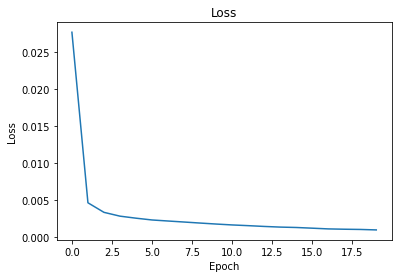

In [ ]:
plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot()

# Train Data Preprocessing

In [ ]:
test.tail()

,close,high,low,open,volume
153498,1191.700,1191.700,1191.700,1191.700,0
153499,1191.700,1191.700,1191.700,1191.700,0
153500,1191.700,1191.700,1191.700,1191.700,0
153501,1191.700,1191.800,1191.500,1191.700,1993
153502,1191.800,1191.900,1191.700,1191.700,7305


In [ ]:
train.tail(50)

,close,high,low,open,volume
138103,1196.200,1196.700,1195.300,1196.000,20513
138104,1193.400,1196.200,1193.400,1196.200,10704
138105,1191.500,1194.000,1191.500,1193.400,45862
138106,1193.300,1193.300,1192.500,1191.500,35008
138107,1194.100,1194.100,1193.600,1193.300,5525
138108,1194.100,1194.100,1194.100,1194.100,3248
138109,1193.100,1194.500,1192.900,1194.100,36002
138110,1193.400,1193.600,1192.900,1193.100,22381
138111,1193.800,1193.800,1193.400,1193.400,1797
138112,1195.600,1195.700,1194.700,1193.800,11483


In [ ]:
#it should be past_3_days
past_50_days =  train.tail(50)

In [ ]:
df = past_50_days.append(test, ignore_index=True)

In [ ]:
df.head()

,close,high,low,open,volume
0,1196.200,1196.700,1195.300,1196.000,20513
1,1193.400,1196.200,1193.400,1196.200,10704
2,1191.500,1194.000,1191.500,1193.400,45862
3,1193.300,1193.300,1192.500,1191.500,35008
4,1194.100,1194.100,1193.600,1193.300,5525


In [ ]:
test_s = scaler.transform(df)
test_s

array([[7.81564834e-01, 7.67563108e-01, 7.90771812e-01, 7.81230682e-01,
        5.34843435e-03],
       [7.76886706e-01, 7.66738162e-01, 7.87583893e-01, 7.81564834e-01,
        2.79089559e-03],
       [7.73712262e-01, 7.63108398e-01, 7.84395973e-01, 7.76886706e-01,
        1.19577778e-02],
       ...,
       [7.74046414e-01, 7.59313645e-01, 7.84731544e-01, 7.74046414e-01,
        0.00000000e+00],
       [7.74046414e-01, 7.59478634e-01, 7.84395973e-01, 7.74046414e-01,
        5.19642649e-04],
       [7.74213490e-01, 7.59643623e-01, 7.84731544e-01, 7.74046414e-01,
        1.90466109e-03]])

In [ ]:
X_test = []
y_test = []

#look back 50
for i in range(50, test_s.shape[0]):
  X_test.append(test_s[i-50 : i])
  #predecting how hight value will get 
  y_test.append(test_s[i,1])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test.shape, y_test.shape

((15350, 50, 5), (15350,))

# Making Prediction

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(15350, 1)


In [ ]:
scaler.scale_

array([1.67076003e-03, 1.64989276e-03, 1.67785235e-03, 1.67076003e-03,
       2.60733893e-07])

In [ ]:
scale = 1/1.67076003e-03
scale

598.5299995475712

In [ ]:
y_pred = y_pred * scale
y_test = y_test * scale

In [ ]:
y_pred.shape, y_test.shape

((15350, 1), (15350,))

# Plottting Predection

[]

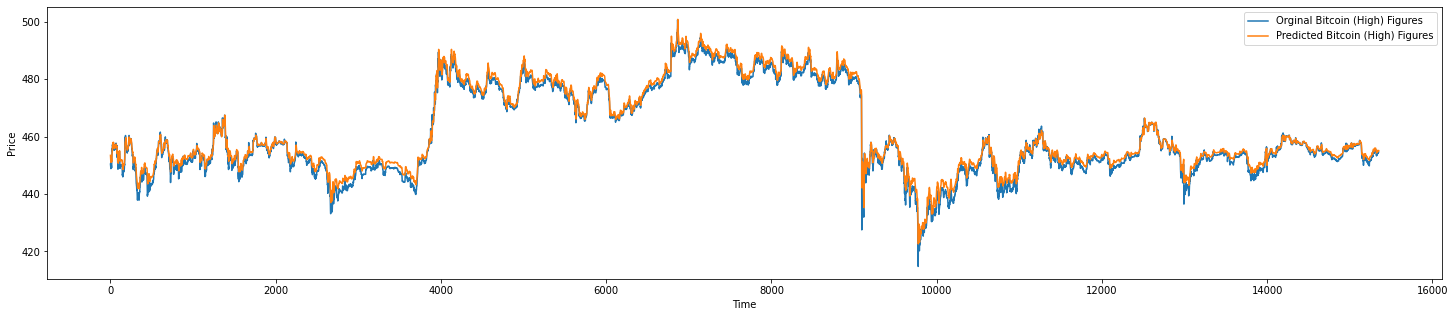

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(y_test, label='Orginal Bitcoin (High) Figures')
plt.plot(y_pred, label='Predicted Bitcoin (High) Figures')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.plot()

In [ ]:
#saving the model
model.save('Bitcoin.h5')

# Mean Squared Error 

In [ ]:
 from sklearn.metrics import mean_squared_error

In [ ]:
error = mean_squared_error(y_test, y_pred)

In [ ]:
print('The error is {}'.format(error))

The error is 3.138843206031678


# Root Mean Squared Error

In [ ]:
rms = mean_squared_error(y_test, y_pred, squared=False)


In [ ]:
print('The Root Mean Squared Error is {}'.format(rms))

The Root Mean Squared Error is 1.7716780762970676


# R2 Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print('The R2 score is {}'.format(r2))

The R2 score is 0.9861785439722416
